# Tabular Kaggle Project

# Defining the Project

https://www.kaggle.com/competitions/santander-product-recommendation/data 

We are taking various features of customers' behavior data from Santander bank, such as ages, genders, employee status, customer activity, etc., and predicting what kind of product they'd purchase. Products range from different bank accounts, deposits, credit cards, etc. 

We have 24 independent variables and 24 dependent variables = 48 columns in total, and 6 million+ rows. I divided the rows into 6 separate .csv files via Linux, and will only be using a million rows. 

All 24 dependent variables have values 0 and 1, so this is a supervised multiclass machine learning problem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('TRAIN100k.csv')
df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,2015-01-28,890570,N,ES,V,24,2010-09-02,0.0,58,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1
99995,2015-01-28,890561,N,ES,H,25,2010-09-02,0.0,58,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
99996,2015-01-28,890559,N,ES,H,48,2010-09-03,0.0,58,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1
99997,2015-01-28,890557,N,ES,V,53,2010-09-02,0.0,58,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


![Alt text](table1.png)

![Alt text](table2.png)

Our target variables are ind_('...')_ult1, which are the columns #25 - #48. They are encoded as [0,1]

# Cleaning and Preparing Data for ML

In [2]:
df.dtypes

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes              float64
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                 float64
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_f

In [3]:
# Let's check if our values corresponds with the data type
for i in df.columns:
    print(f"{i}\n", df[i].unique(), "\n", f"Values = {df[i].unique().size}\n")

fecha_dato
 ['2015-01-28'] 
 Values = 1

ncodpers
 [1375586 1050611 1050612 ...  890559  890557  890498] 
 Values = 99999

ind_empleado
 ['N' nan] 
 Values = 2

pais_residencia
 ['ES' nan 'CA' 'CH' 'CL' 'IE' 'AT' 'NL' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR' 'VE'
 'US' 'MX' 'BR' 'IT' 'EC' 'PE' 'CO' 'HN' 'FI' 'SE' 'AL' 'PT' 'MZ' 'CN'
 'TW' 'PL' 'IN' 'CR' 'NI'] 
 Values = 34

sexo
 ['H' 'V' nan] 
 Values = 3

age
 [' 35' ' 23' ' 22' ' 24' ' 65' ' 28' ' 25' ' 26' ' 53' ' 27' ' 32' ' 37'
 ' 31' ' 39' ' 63' ' 33' ' 55' ' 42' ' 58' ' 38' ' 50' ' 30' ' 45' ' 44'
 ' 36' ' 29' ' 60' ' 57' ' 67' ' 47' ' NA' ' 34' ' 48' ' 46' ' 54' ' 84'
 ' 15' ' 12' '  8' '  6' ' 83' ' 40' ' 77' ' 69' ' 52' ' 59' ' 43' ' 10'
 '  9' ' 49' ' 41' ' 51' ' 78' ' 16' ' 11' ' 73' ' 62' ' 66' ' 17' ' 68'
 ' 82' ' 95' ' 96' ' 56' ' 61' ' 79' ' 72' ' 14' ' 19' ' 13' ' 86' ' 64'
 ' 20' ' 89' ' 71' '  7' ' 70' ' 74' ' 21' ' 18' ' 75' '  4' ' 80' ' 81'
 '  5' ' 76' ' 92' ' 93' ' 85' ' 91' ' 87' ' 90' ' 94' ' 99' ' 98' ' 88'
 ' 97' '100

Observations:

+ fecha_dato and ncodpers are similar to ID columns. Not needed in analysis. **Delete columns**

+ conyeump only has **nan** values. tipodom, ind_ahor_fin_ult1, ind_aval_fin_ult1 only have 1 value (other than **nan**). **Delete these columns.**

+ ind_nomina_ult1 and ind_nom_pens_ult1 have missing values **Clean missing data**

+ age, antigudad have the wrong data type, it should be an ***INTEGER***.

+ fecha_alta and ult_fec_cli_1t have the wrong data type, they should be in ***DATE/TIME FORMAT***

+ ind_nuevo, indrel, indrel_1mes, ind_actividad_cliente, are encoded categorical variables. That's cool.

In [4]:
# Dropping irrelevant columns

df.drop(['fecha_dato','ncodpers', 'conyuemp', 'tipodom', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1'], axis=1, inplace=True)

## Changing Data Types

In [5]:
# CHANGING DATA TYPES

# Dates
df["fecha_alta"]=pd.to_datetime(df["fecha_alta"])
df["ult_fec_cli_1t"]=pd.to_datetime(df["ult_fec_cli_1t"])

# Numeric
df.loc[df['antiguedad']=='     NA','antiguedad']=None
df["antiguedad"]=pd.to_numeric(df["antiguedad"])
df.loc[df['age']==' NA','age']=None
df["age"]=pd.to_numeric(df["age"])

## Missing Data

In [6]:
# MISSING DATA

missing_data=df.isnull().sum()
print("Missing data:\n", missing_data)

Missing data:
 ind_empleado               683
pais_residencia            683
sexo                       683
age                        683
fecha_alta                 683
ind_nuevo                  683
antiguedad                 683
indrel                     683
ult_fec_cli_1t           99871
indrel_1mes                683
tiprel_1mes                683
indresi                    683
indext                     683
canal_entrada              688
indfall                    683
cod_prov                   769
nomprov                    769
ind_actividad_cliente      683
renta                    18283
segmento                   691
ind_cco_fin_ult1             0
ind_cder_fin_ult1            0
ind_cno_fin_ult1             0
ind_ctju_fin_ult1            0
ind_ctma_fin_ult1            0
ind_ctop_fin_ult1            0
ind_ctpp_fin_ult1            0
ind_deco_fin_ult1            0
ind_deme_fin_ult1            0
ind_dela_fin_ult1            0
ind_ecue_fin_ult1            0
ind_fond_fin_ult1       

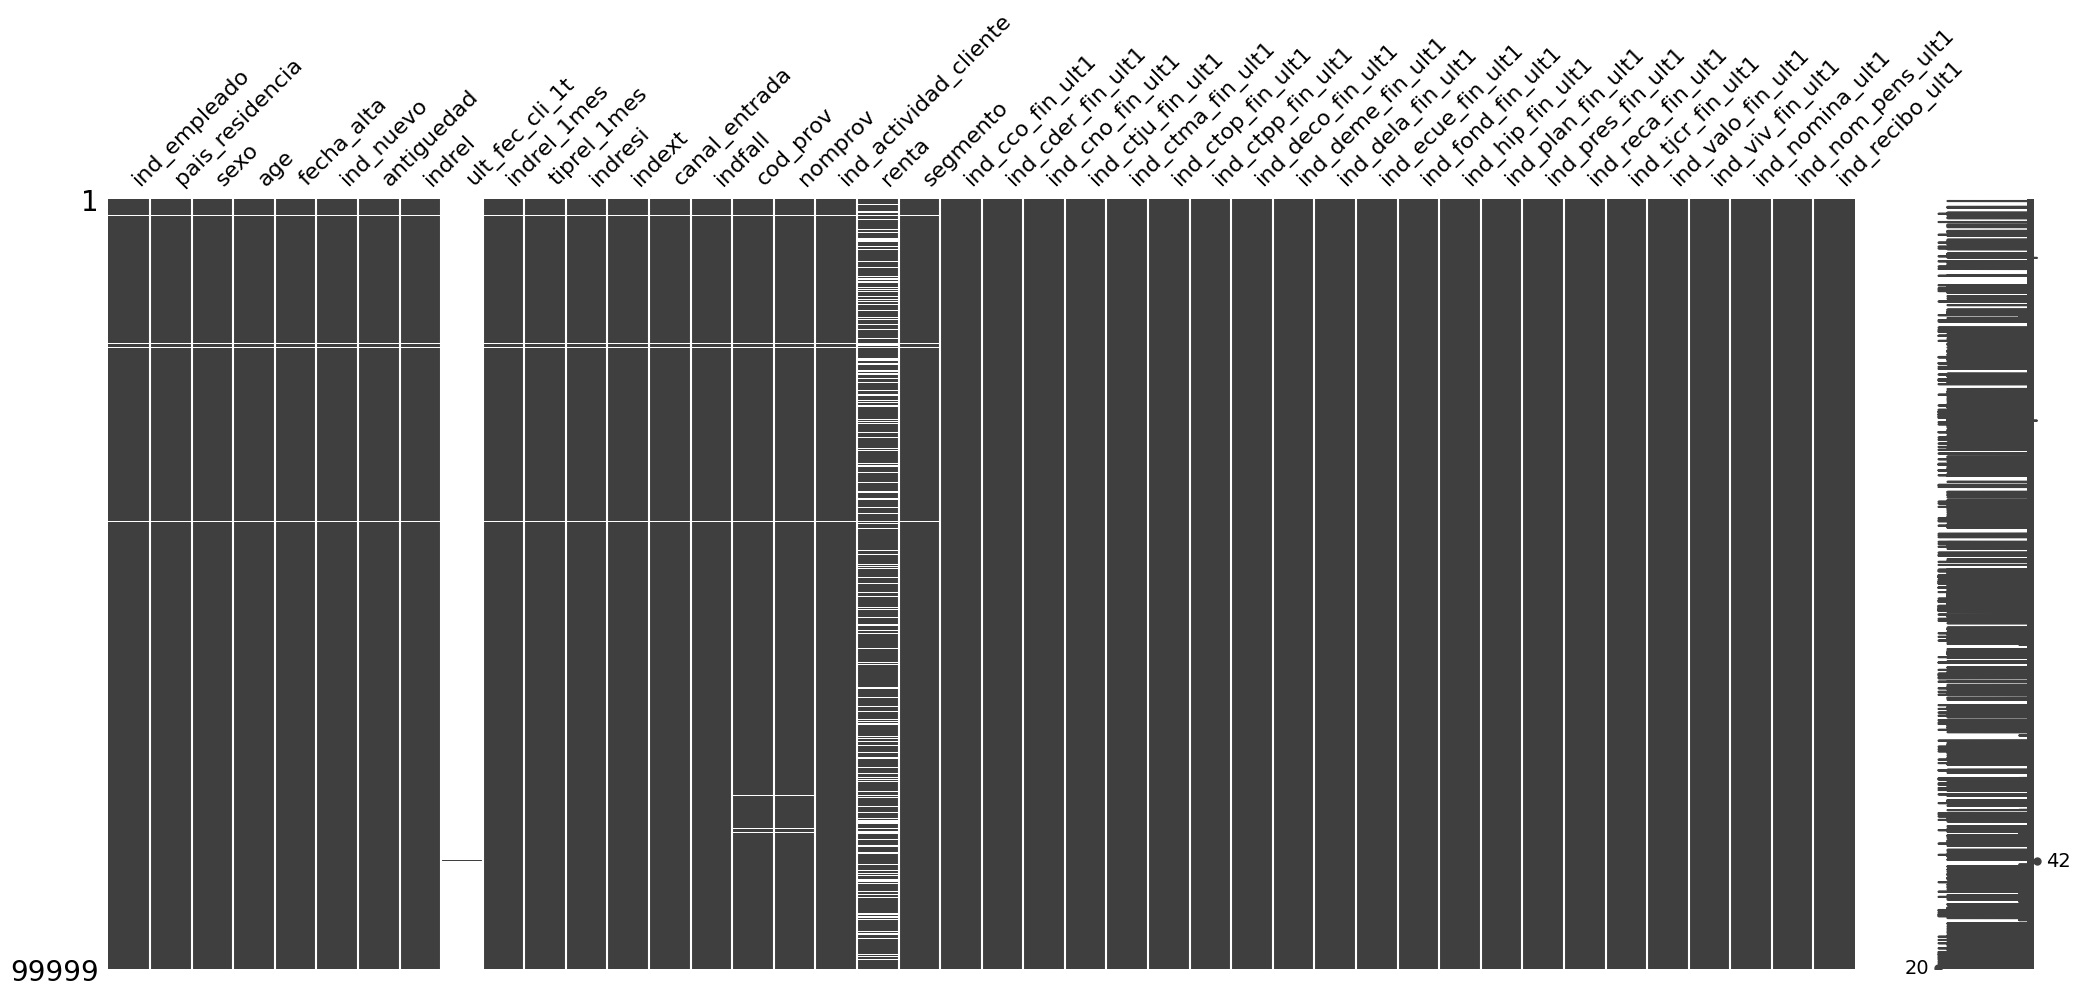

In [7]:
import missingno as msno

msno.matrix(df)
plt.show()

ult_fec_cli_1t has a lot of missing values. We are going to delete this column.



In [8]:
df.drop('ult_fec_cli_1t', axis=1, inplace=True)

In [9]:
# Let's removing the rows with missing values

missing = ['ind_empleado', 'pais_residencia', 'sexo',
           'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
           'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
           'canal_entrada', 'indfall', 'cod_prov',
           'nomprov', 'ind_actividad_cliente', 'segmento', 'ind_nomina_ult1','ind_nom_pens_ult1']

df = df.dropna(subset=missing)

In [10]:
missing_data=df.isnull().sum()
print("Missing data:\n", missing_data)

Missing data:
 ind_empleado                 0
pais_residencia              0
sexo                         0
age                          0
fecha_alta                   0
ind_nuevo                    0
antiguedad                   0
indrel                       0
indrel_1mes                  0
tiprel_1mes                  0
indresi                      0
indext                       0
canal_entrada                0
indfall                      0
cod_prov                     0
nomprov                      0
ind_actividad_cliente        0
renta                    17510
segmento                     0
ind_cco_fin_ult1             0
ind_cder_fin_ult1            0
ind_cno_fin_ult1             0
ind_ctju_fin_ult1            0
ind_ctma_fin_ult1            0
ind_ctop_fin_ult1            0
ind_ctpp_fin_ult1            0
ind_deco_fin_ult1            0
ind_deme_fin_ult1            0
ind_dela_fin_ult1            0
ind_ecue_fin_ult1            0
ind_fond_fin_ult1            0
ind_hip_fin_ult1        

In [11]:
# Let's replace renta's missing with its median

median_renta = df['renta'].median()

df['renta'].fillna(median_renta, inplace=True)

/tmp/ipykernel_10645/2099516865.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['renta'].fillna(median_renta, inplace=True)


## Duplicates

In [12]:
duplicates=df.duplicated().sum()
print("Number of Duplicate Records: ", duplicates)

Number of Duplicate Records:  2722


In [13]:
df=df.drop_duplicates()

In [14]:
duplicates=df.duplicated().sum()
print("Number of Duplicate Records: ", duplicates)

Number of Duplicate Records:  0


Let's check for invalid entries

## Invalid Entries and Outliers

In [15]:
features = ['ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta',
       'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes', 'tiprel_1mes',
       'indresi', 'indext', 'canal_entrada', 'indfall', 'cod_prov', 'nomprov',
       'ind_actividad_cliente', 'renta', 'segmento']

df[features].describe()

,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,cod_prov,ind_actividad_cliente,renta
count,96495.000000,96495,96495.000000,96495.000000,96495.000000,96495.0,96495.000000,96495.000000,9.649500e+04
mean,29.492481,2012-06-30 21:50:33.446292736,0.000114,36.378776,1.126950,1.0,25.039038,0.417027,1.115668e+05
min,4.000000,2002-06-14 00:00:00,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,2.539800e+03
25%,23.000000,2012-06-18 00:00:00,0.000000,33.000000,1.000000,1.0,11.000000,0.000000,6.683498e+04
50%,25.000000,2012-09-06 00:00:00,0.000000,34.000000,1.000000,1.0,28.000000,0.000000,8.961030e+04
75%,31.000000,2012-10-25 00:00:00,0.000000,37.000000,1.000000,1.0,36.000000,1.000000,1.222534e+05
max,106.000000,2015-01-26 00:00:00,1.000000,157.000000,99.000000,1.0,52.000000,1.000000,2.425324e+07
std,10.649402,NaN,0.010676,6.602483,3.524922,0.0,13.656111,0.493070,1.469700e+05


In age, the minimum is 4, which cannot be right. 157 months seems to be weird for antiguedad, but let's look at the distributions for age, antiguedad, and renta.

indrel_1mes only has 1 value now, so we will delete this column.

In [16]:
df.drop('indrel_1mes', axis=1, inplace=True)

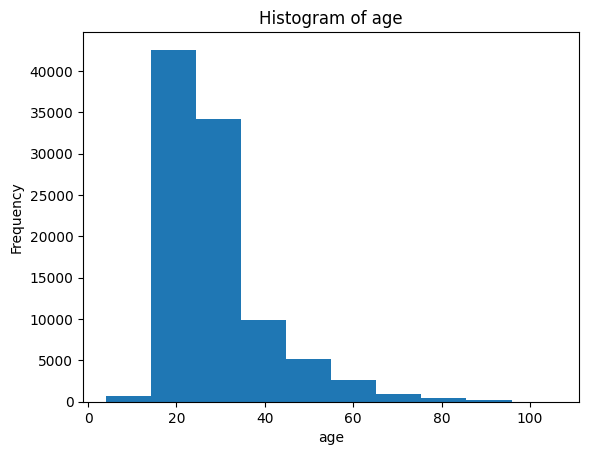

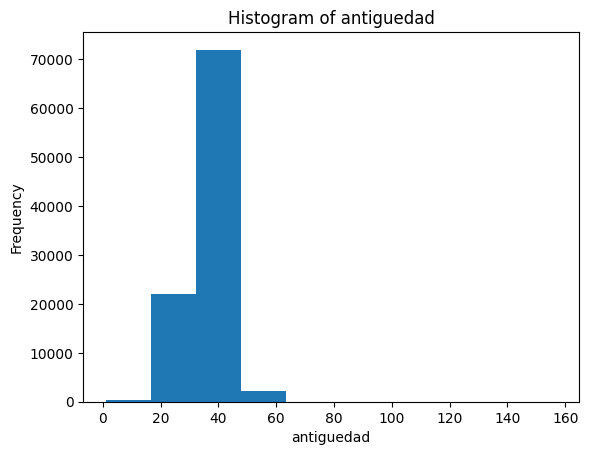

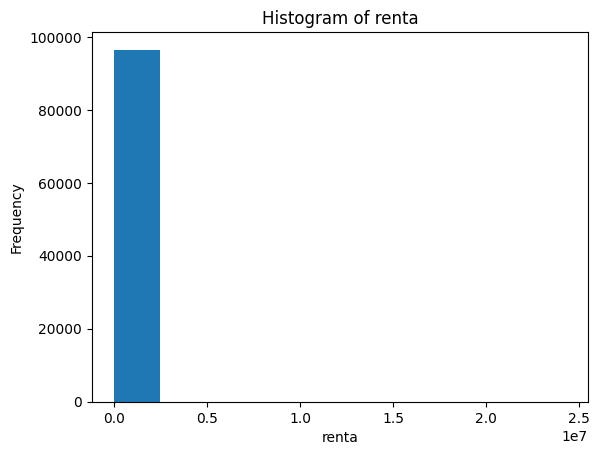

In [17]:
num = ['age', 'antiguedad', 'renta']

for col in num:
  plt.hist(df[col])
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {col}')
  plt.show()

They are all right skewed.

In [18]:
# Checking for outliers

def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return (column < lower_bound) | (column > upper_bound)

indep_n = ['age', 'antiguedad', 'renta']

for col in indep_n:
    outliers = detect_outliers(df[col])
    num_outliers = outliers.sum()
    total_values = len(df[col])
    percentage_outliers = (num_outliers / total_values) * 100
    print(f"{col} Outliers: {num_outliers} ({percentage_outliers:.2f}%)\n")

age Outliers: 10387 (10.76%)

antiguedad Outliers: 21906 (22.70%)

renta Outliers: 7638 (7.92%)



In [19]:
def handle_outliers(col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)

  df.loc[df[col]>upper_bound, col] = Q3
  df.loc[df[col]<lower_bound, col] = Q1

for col in indep_n:
  handle_outliers(col)

for col in indep_n:
  d = detect_outliers(df[col]).sum()
  print(f"{col} Outliers: {d}\n")

age Outliers: 0

antiguedad Outliers: 0

renta Outliers: 0



In [20]:
df.describe()

,age,fecha_alta,ind_nuevo,antiguedad,indrel,cod_prov,ind_actividad_cliente,renta,ind_cco_fin_ult1,ind_cder_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,96495.000000,96495,96495.000000,96495.000000,96495.000000,96495.000000,96495.000000,96495.000000,96495.000000,96495.000000,...,96495.000000,96495.000000,96495.000000,96495.000000,96495.000000,96495.000000,96495.000000,96495.000000,96495.000000,96495.000000
mean,27.056303,2012-06-30 21:50:33.446292736,0.000114,34.270066,1.126950,25.039038,0.417027,93696.898737,0.903601,0.000041,...,0.000114,0.001306,0.000197,0.018934,0.019182,0.004726,0.000062,0.033867,0.036499,0.100472
min,11.000000,2002-06-14 00:00:00,0.000000,27.000000,1.000000,1.000000,0.000000,2539.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,2012-06-18 00:00:00,0.000000,33.000000,1.000000,11.000000,0.000000,66834.975000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2012-09-06 00:00:00,0.000000,34.000000,1.000000,28.000000,0.000000,89610.300000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,2012-10-25 00:00:00,0.000000,37.000000,1.000000,36.000000,1.000000,122252.430000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,43.000000,2015-01-26 00:00:00,1.000000,43.000000,99.000000,52.000000,1.000000,205371.300000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,5.040616,NaN,0.010676,2.472763,3.524922,13.656111,0.493070,37450.863082,0.295139,0.006438,...,0.010676,0.036112,0.014031,0.136291,0.137166,0.068581,0.007885,0.180888,0.187530,0.300629


For age, we still have the minimum being 11. Let's cap at 18.

In [21]:
df.loc[df['age']<18, 'age'] = 18
df.describe()

,age,fecha_alta,ind_nuevo,antiguedad,indrel,cod_prov,ind_actividad_cliente,renta,ind_cco_fin_ult1,ind_cder_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,96495.00000,96495,96495.000000,96495.000000,96495.000000,96495.000000,96495.000000,96495.000000,96495.000000,96495.000000,...,96495.000000,96495.000000,96495.000000,96495.000000,96495.000000,96495.000000,96495.000000,96495.000000,96495.000000,96495.000000
mean,27.07390,2012-06-30 21:50:33.446292736,0.000114,34.270066,1.126950,25.039038,0.417027,93696.898737,0.903601,0.000041,...,0.000114,0.001306,0.000197,0.018934,0.019182,0.004726,0.000062,0.033867,0.036499,0.100472
min,18.00000,2002-06-14 00:00:00,0.000000,27.000000,1.000000,1.000000,0.000000,2539.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.00000,2012-06-18 00:00:00,0.000000,33.000000,1.000000,11.000000,0.000000,66834.975000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.00000,2012-09-06 00:00:00,0.000000,34.000000,1.000000,28.000000,0.000000,89610.300000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.00000,2012-10-25 00:00:00,0.000000,37.000000,1.000000,36.000000,1.000000,122252.430000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,43.00000,2015-01-26 00:00:00,1.000000,43.000000,99.000000,52.000000,1.000000,205371.300000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,5.00001,NaN,0.010676,2.472763,3.524922,13.656111,0.493070,37450.863082,0.295139,0.006438,...,0.010676,0.036112,0.014031,0.136291,0.137166,0.068581,0.007885,0.180888,0.187530,0.300629


# Data Visualization

In [22]:
df.columns

Index(['ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta',
       'ind_nuevo', 'antiguedad', 'indrel', 'tiprel_1mes', 'indresi', 'indext',
       'canal_entrada', 'indfall', 'cod_prov', 'nomprov',
       'ind_actividad_cliente', 'renta', 'segmento', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [23]:
# Let's split into features and targets

features = ['ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta',
       'ind_nuevo', 'antiguedad', 'indrel', 'tiprel_1mes', 'indresi', 'indext',
       'canal_entrada', 'indfall', 'cod_prov', 'nomprov',
       'ind_actividad_cliente', 'renta', 'segmento']

target = ['ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

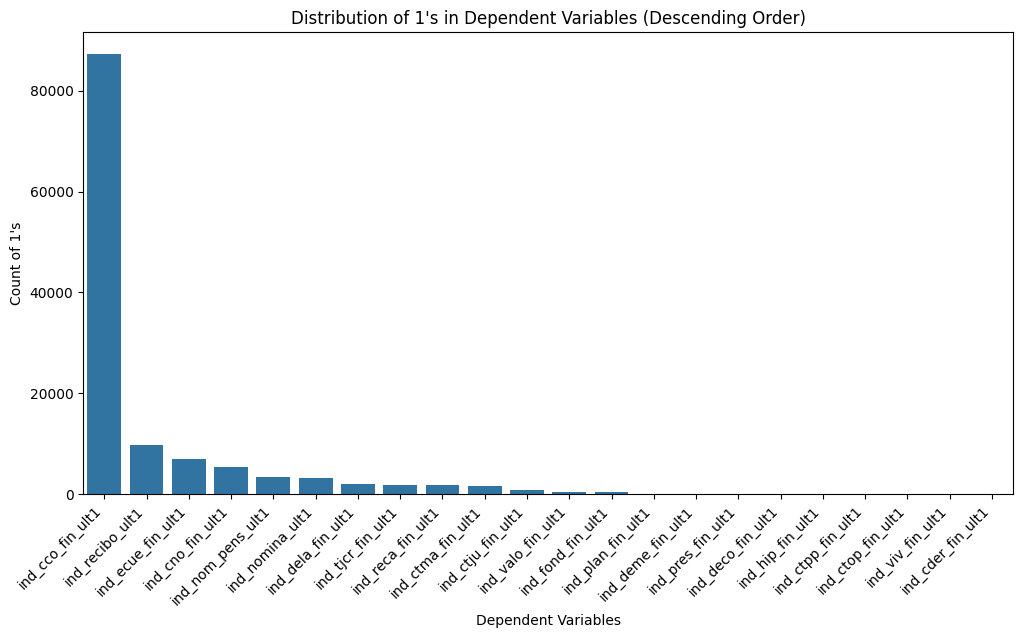

In [24]:
# Let's check the frequency of 1 in the target variables.

counts_ones = df[target].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=counts_ones.index, y=counts_ones)
plt.title('Distribution of 1\'s in Dependent Variables (Descending Order)')
plt.xlabel('Dependent Variables')
plt.ylabel('Count of 1\'s')
plt.xticks(rotation=45, ha='right')
plt.show()

In [25]:
# Count occurrences of 1 in each column
counts = df[target].sum()

# Sort counts in descending order
counts = counts.sort_values(ascending=False)

counts

ind_cco_fin_ult1     87193.0
ind_recibo_ult1       9695.0
ind_ecue_fin_ult1     7053.0
ind_cno_fin_ult1      5355.0
ind_nom_pens_ult1     3522.0
ind_nomina_ult1       3268.0
ind_dela_fin_ult1     2087.0
ind_tjcr_fin_ult1     1851.0
ind_reca_fin_ult1     1827.0
ind_ctma_fin_ult1     1576.0
ind_ctju_fin_ult1      925.0
ind_valo_fin_ult1      456.0
ind_fond_fin_ult1      370.0
ind_plan_fin_ult1      126.0
ind_deme_fin_ult1       34.0
ind_pres_fin_ult1       19.0
ind_deco_fin_ult1       18.0
ind_hip_fin_ult1        11.0
ind_ctpp_fin_ult1       10.0
ind_ctop_fin_ult1        6.0
ind_viv_fin_ult1         6.0
ind_cder_fin_ult1        4.0
dtype: float64

+ 'ind_cco_fin_ult1' has majority of data saying 1. (This is means they have a current account)
+ 'ind_recibo_ult1', 'ind_ecue_fin_ult1', 'ind_cno_fin_ult1', 'ind_nom_pens_ult1', 'ind_nomina_ult1', 'ind_dela_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_reca_fin_ult1', 'ind_ctma_fin_ult1' will be our relevant target columns now

In [26]:
new_targets = ['ind_cco_fin_ult1', 'ind_recibo_ult1', 'ind_ecue_fin_ult1', 'ind_cno_fin_ult1', 
               'ind_nom_pens_ult1', 'ind_nomina_ult1', 'ind_dela_fin_ult1', 'ind_tjcr_fin_ult1', 
               'ind_reca_fin_ult1', 'ind_ctma_fin_ult1']

features = ['ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta',
       'ind_nuevo', 'antiguedad', 'indrel', 'tiprel_1mes', 'indresi', 'indext',
       'canal_entrada', 'indfall', 'cod_prov', 'nomprov',
       'ind_actividad_cliente', 'renta', 'segmento']

# 9 target variables, 18 features

## Visualizing Frequencies

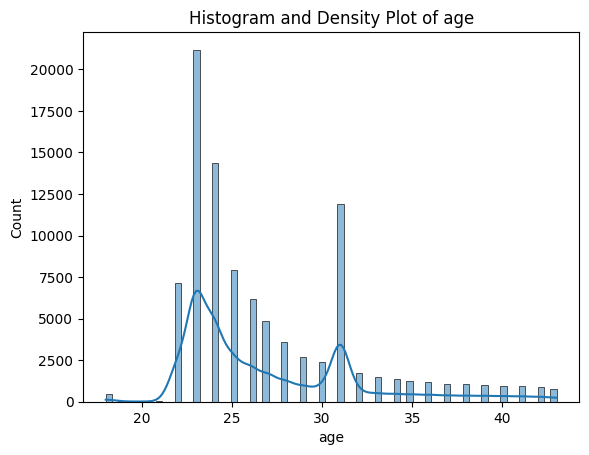

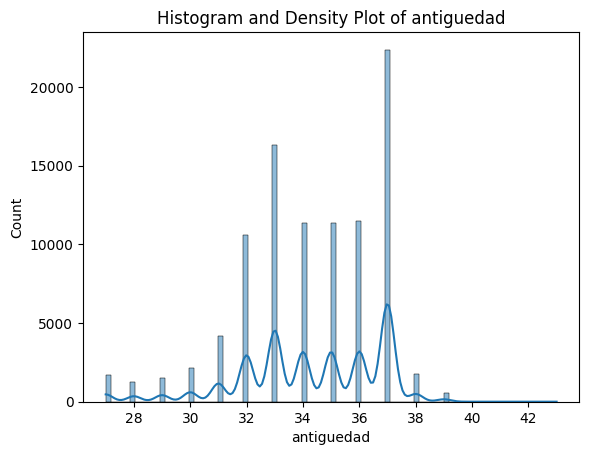

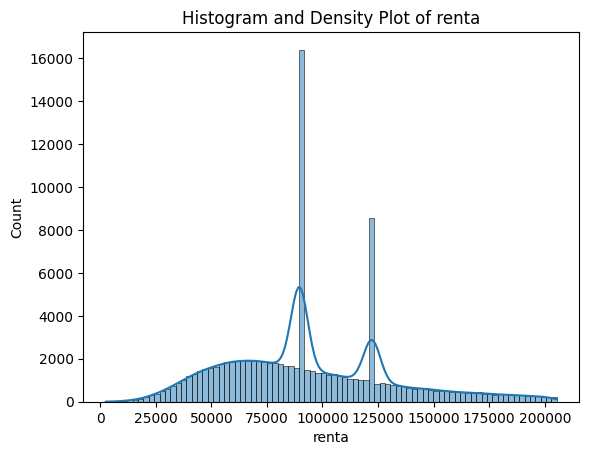

In [27]:
# Looking at frequency of numerical columns

num_columns = ['age', 'antiguedad', 'renta']

for col in num_columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram and Density Plot of {col}")
    plt.show()

There are no heavy skewness in our numerical variables

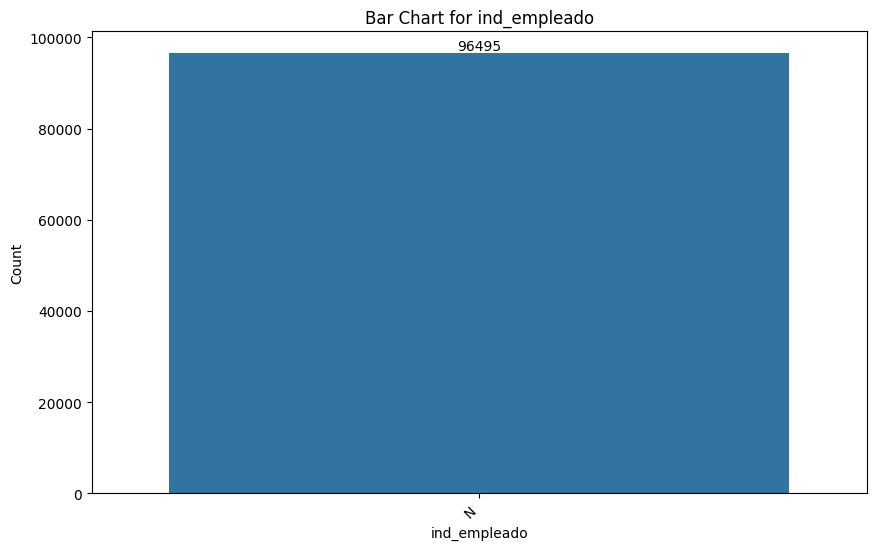

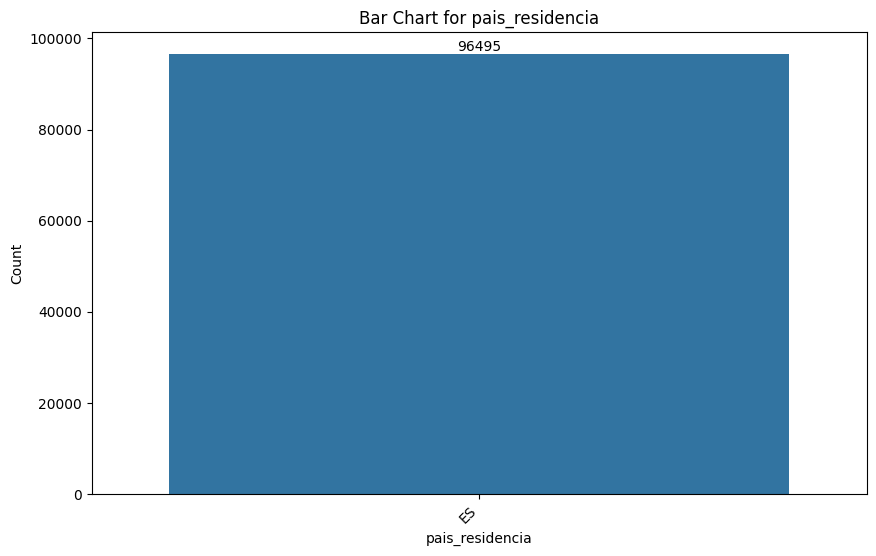

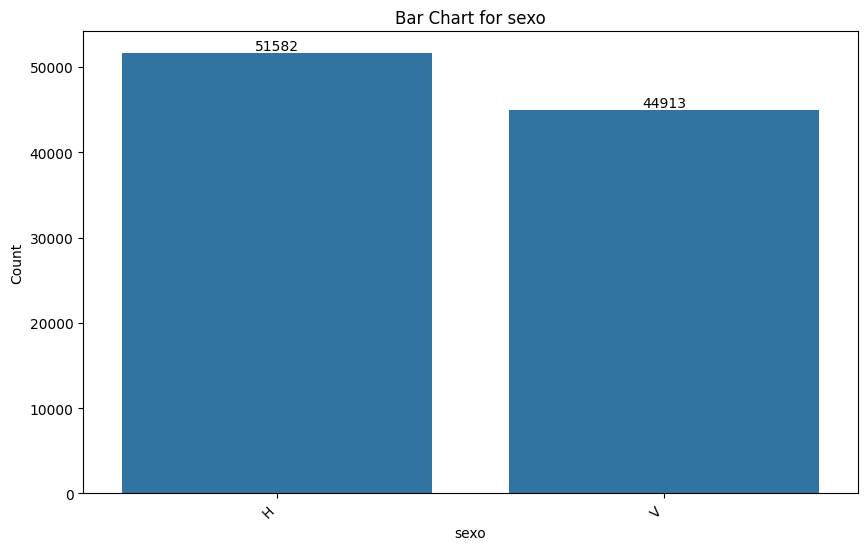

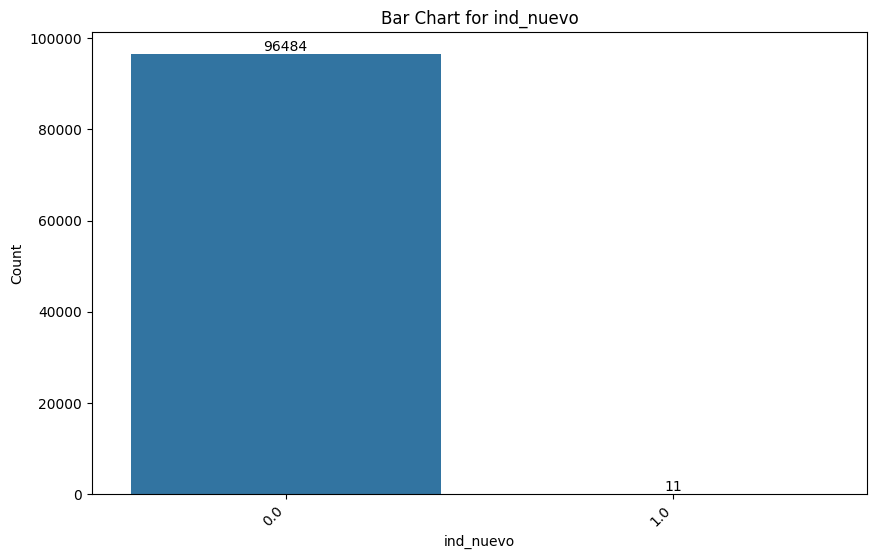

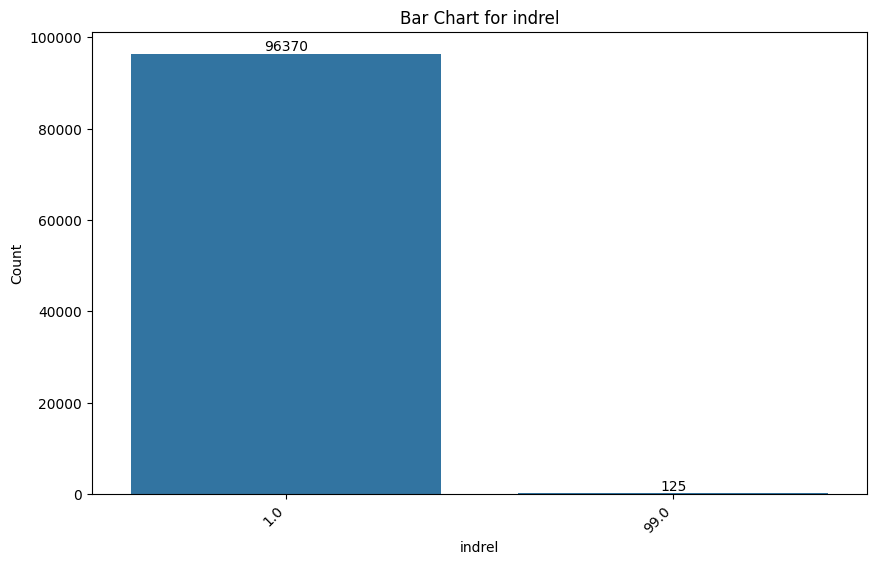

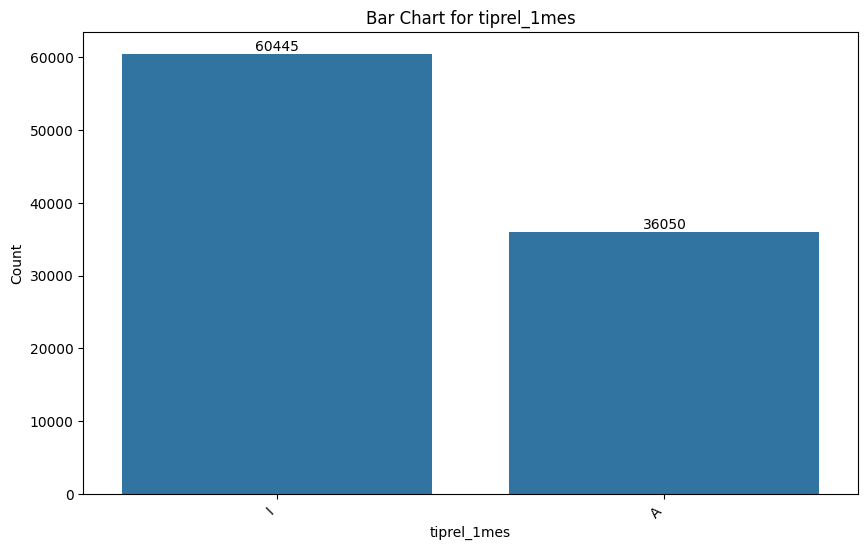

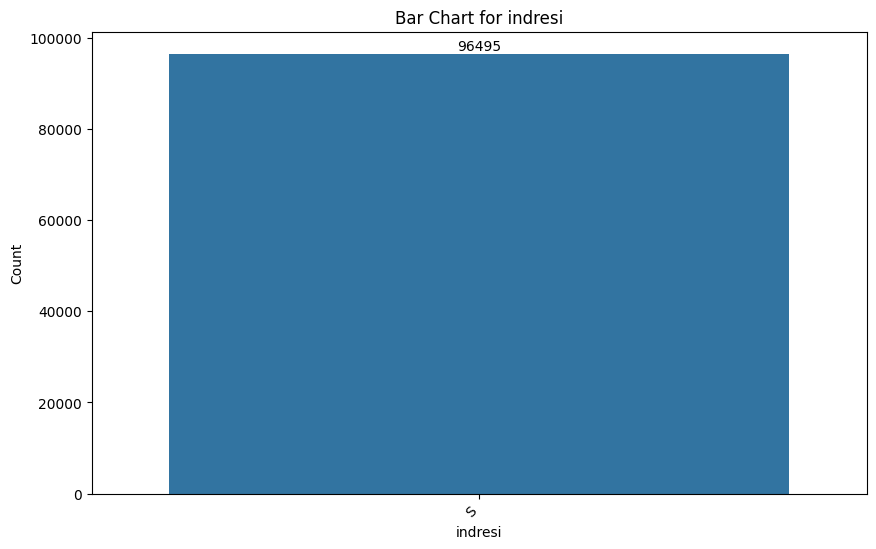

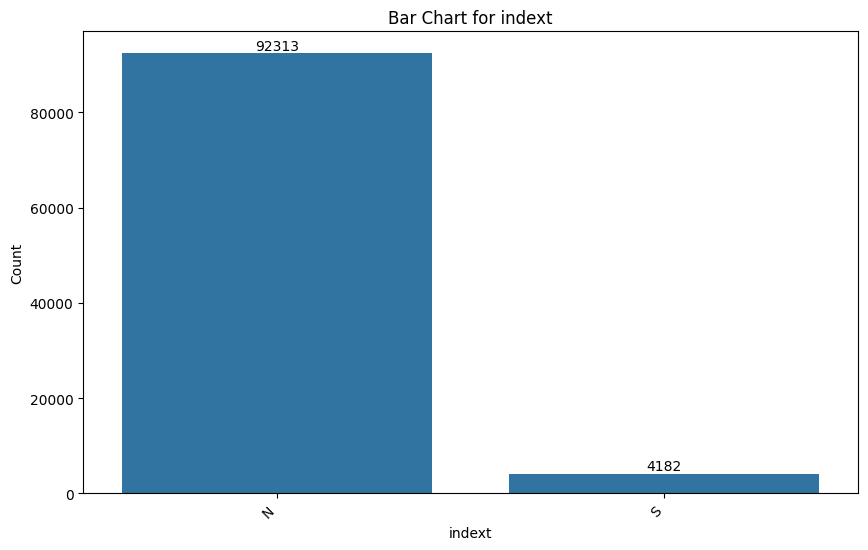

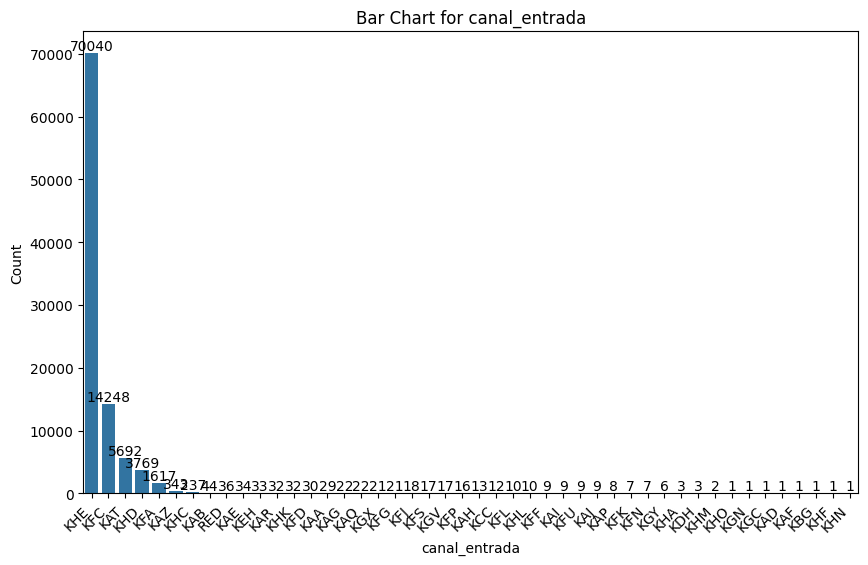

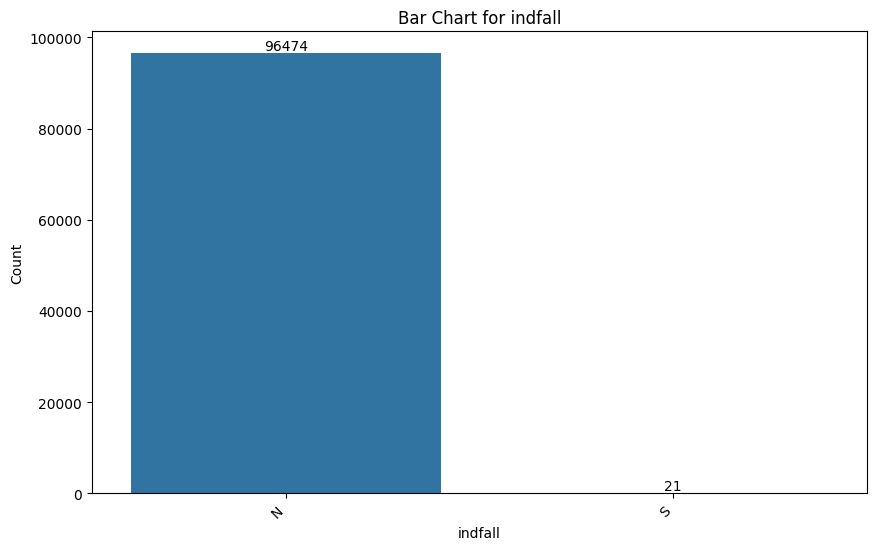

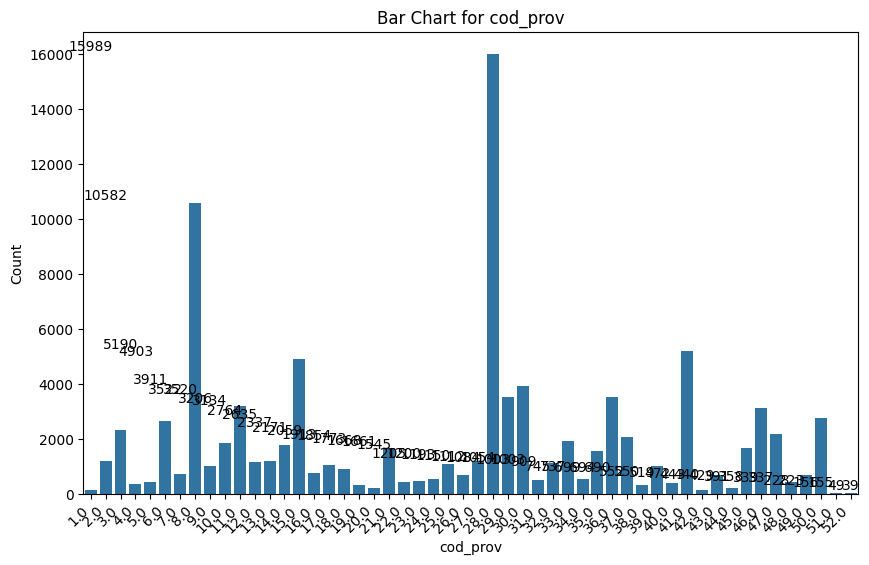

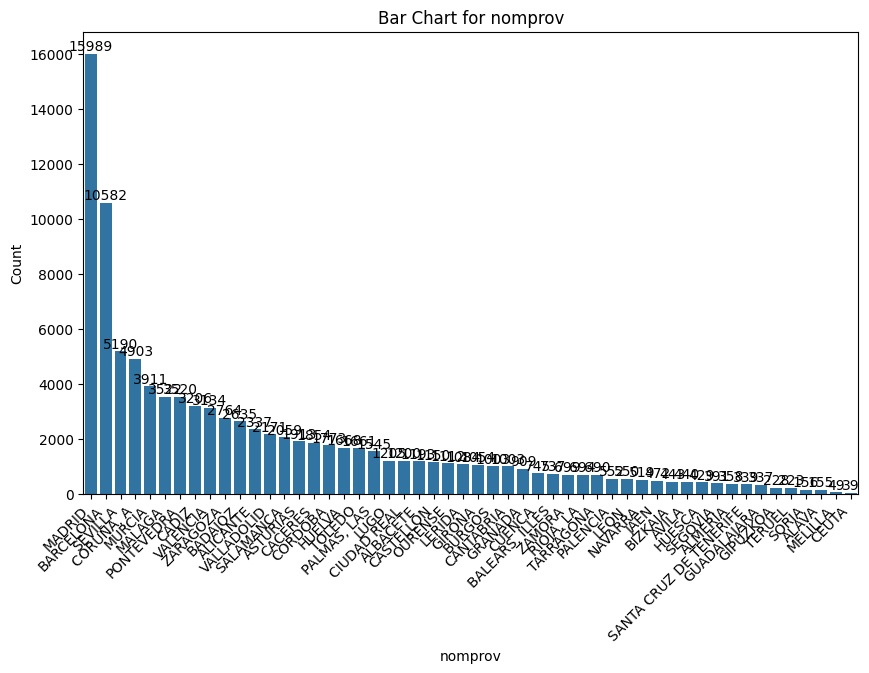

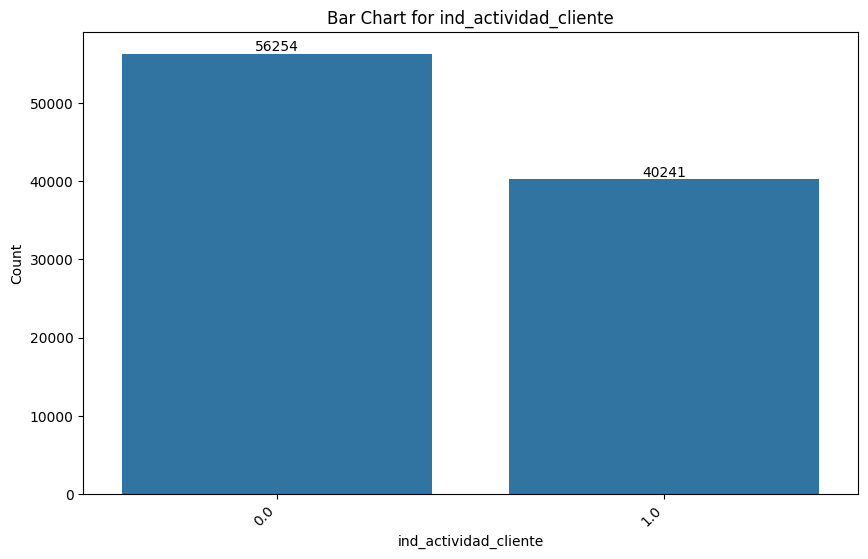

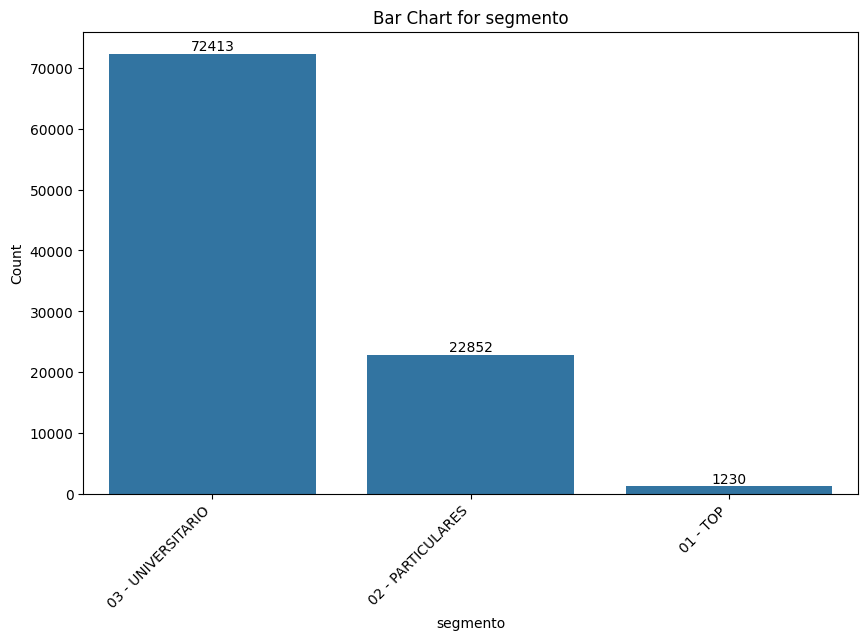

In [28]:
# Looking at frequency of categorical columns

cat_features = ['ind_empleado', 'pais_residencia', 'sexo', 'ind_nuevo', 'indrel', 
            'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'cod_prov', 'nomprov', 
            'ind_actividad_cliente', 'segmento']

for categorical_column in cat_features:

    category_counts = df[categorical_column].value_counts()


    plt.figure(figsize=(10, 6))
    bar_plot = sns.barplot(x=category_counts.index, y=category_counts.values)
    plt.title(f'Bar Chart for {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel('Count')

    # Add text labels on top of the bars
    for index, value in enumerate(category_counts.values):
        plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

Observations:

+ 'ind_empleado', 'pais_residencia', 'indresi' only have 1 value and are irrelevant. Deleting them.
+ There are more males
+ A majority of data is 0 for ind_nuevo, meaning a majority are old customers
+ There are more INACTIVE members than ACTIVE, according to tiprel_1mes and ind_actividad_cliente
+ A majority are not foreigners ('N' in indext)
+ A majority are not deceased ('N' in indfall) (irrelevant)
+ A majority are from province 28 and 8
+ A majority are from Madrid and Barcelona
+ A majority are college accounts

In [29]:
df.drop(['ind_empleado', 'pais_residencia', 'indresi'], axis=1, inplace=True)

In [30]:
cat_features = ['sexo', 'ind_nuevo', 'indrel', 'tiprel_1mes', 'indext', 'canal_entrada', 
                'indfall', 'cod_prov', 'nomprov', 'ind_actividad_cliente', 'segmento']

## Visualizing Relationships

In [31]:
new_features = ['sexo', 'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'tiprel_1mes', 'indext', 'canal_entrada', 'indfall', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento']

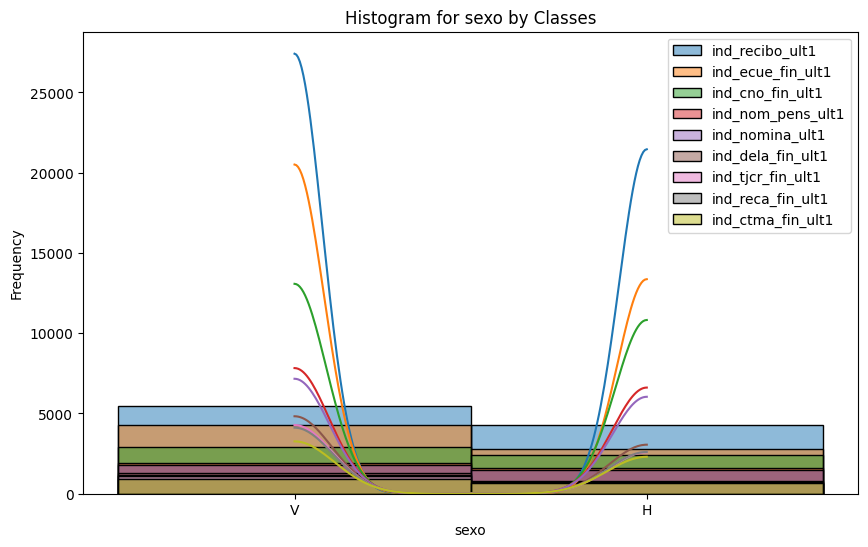

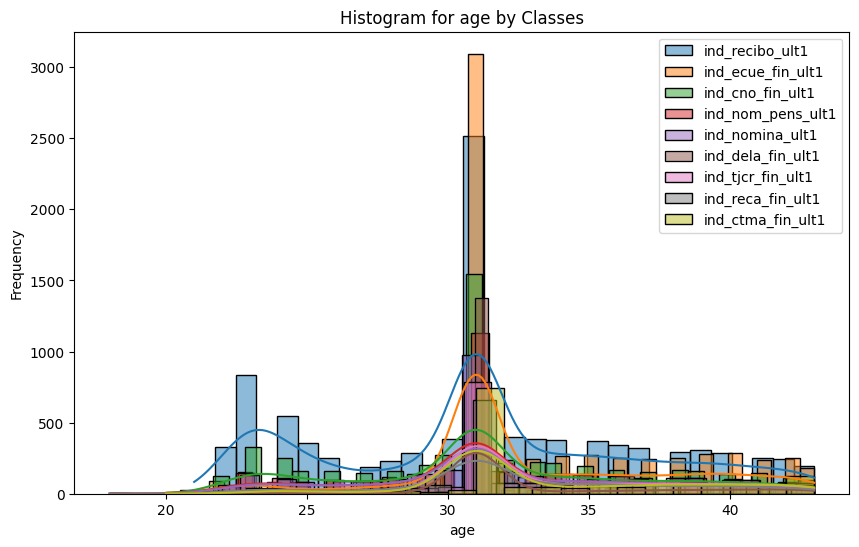

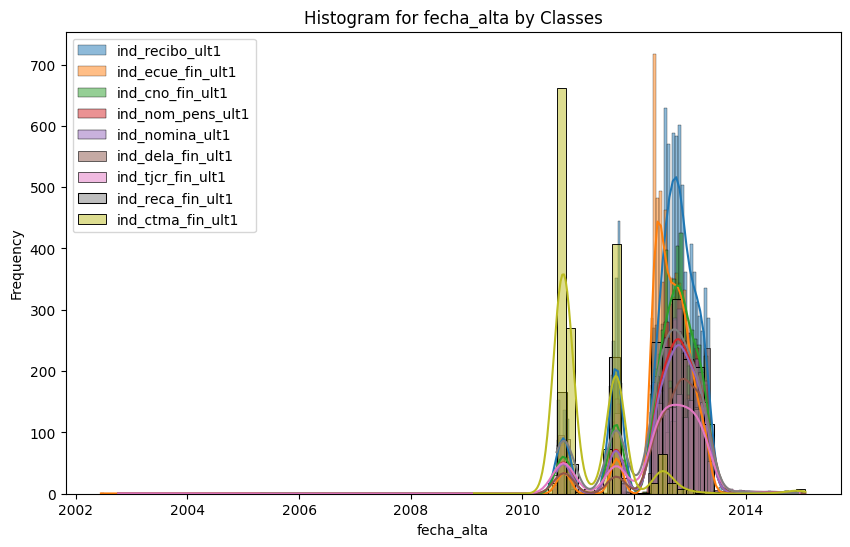

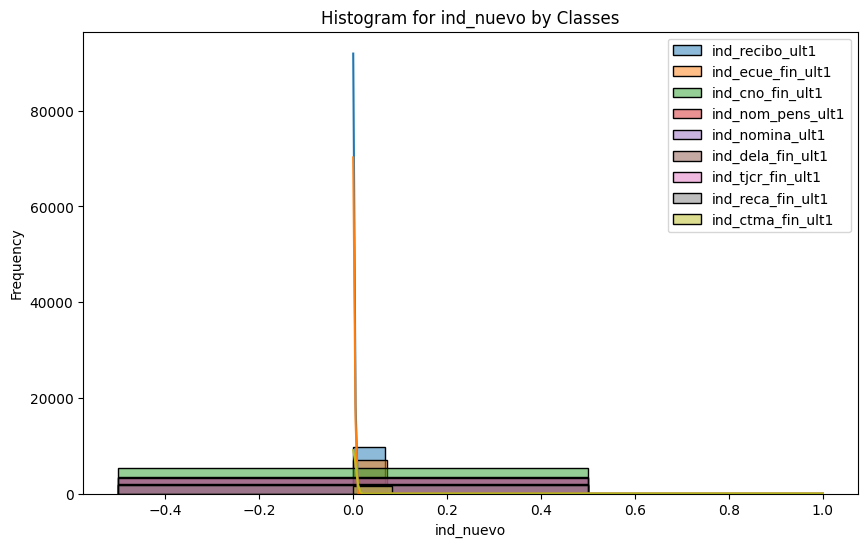

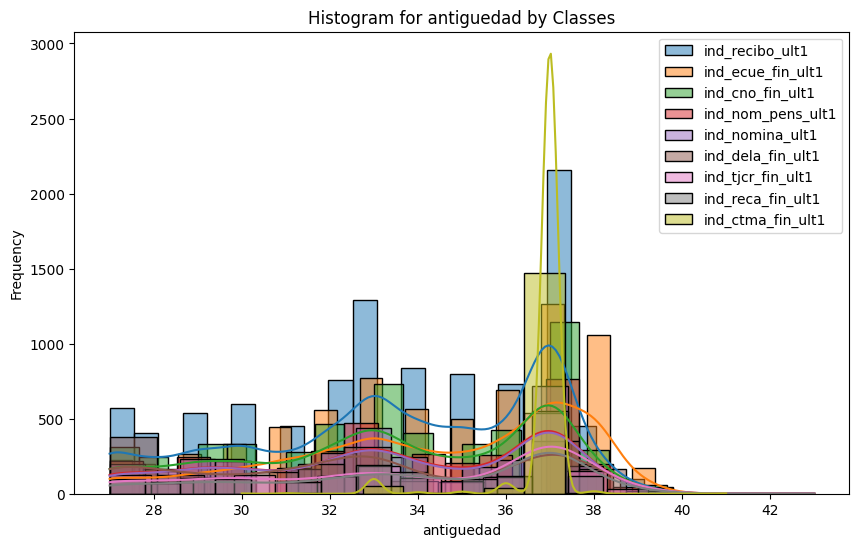

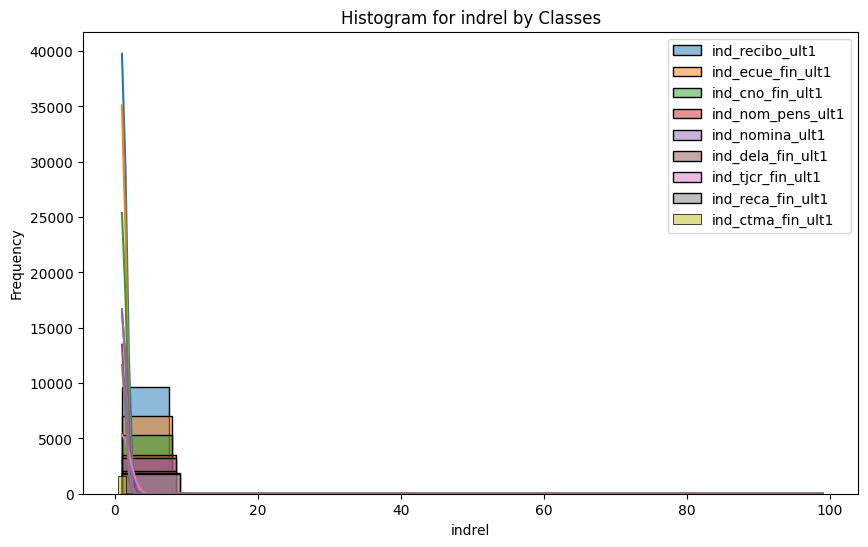

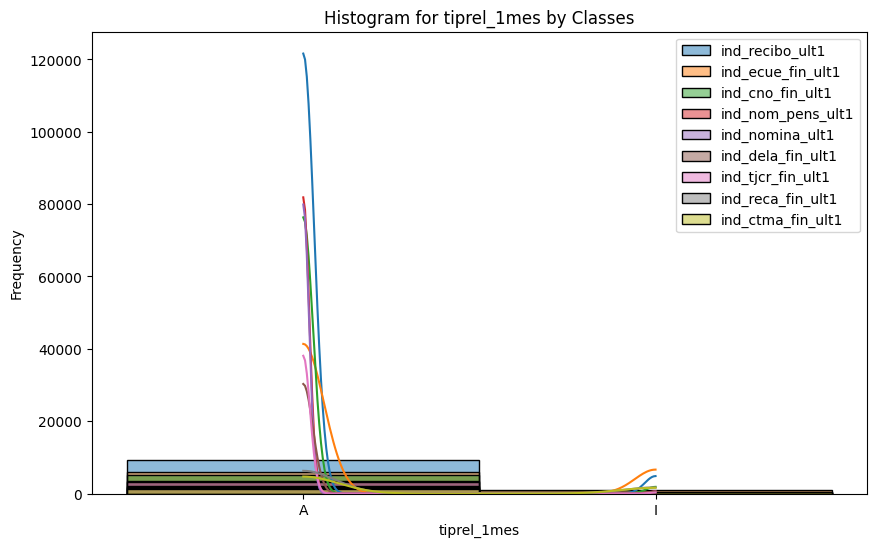

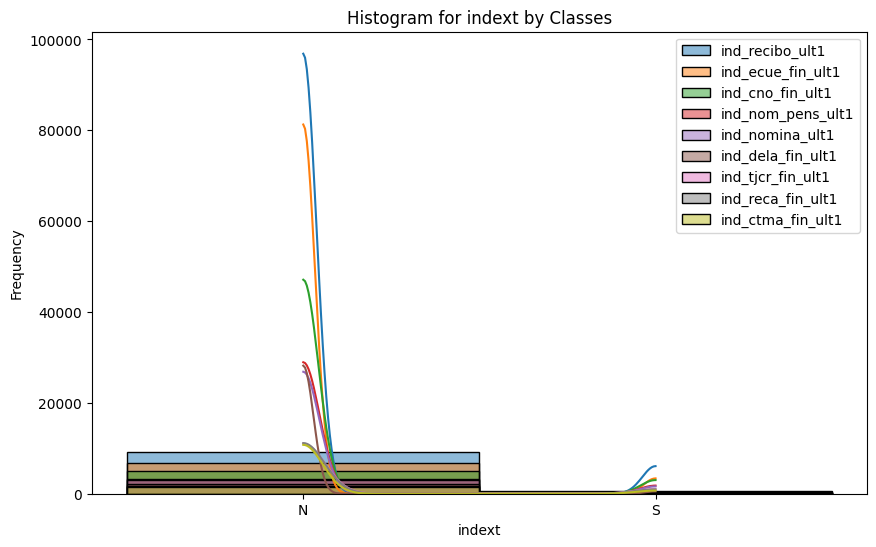

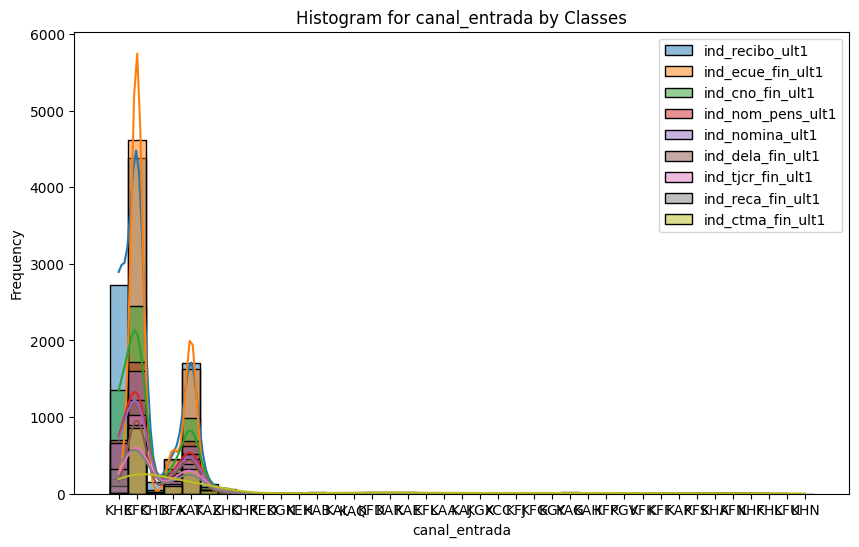

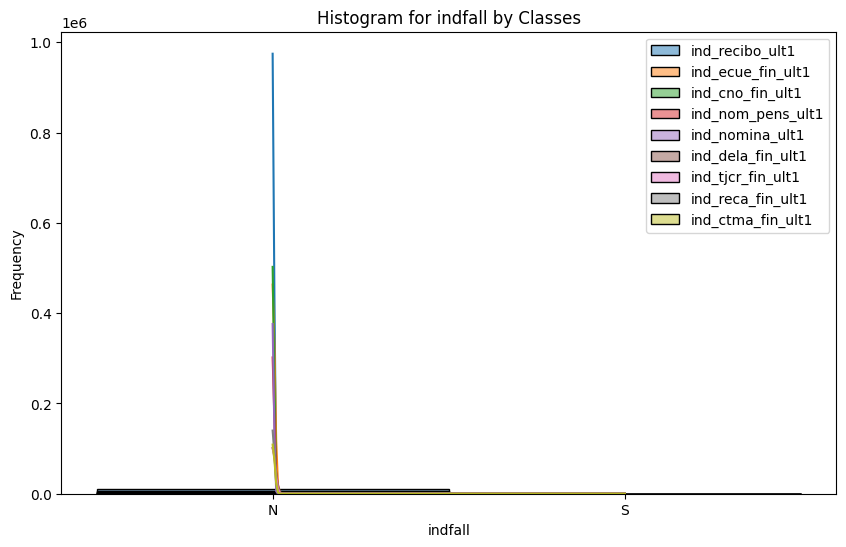

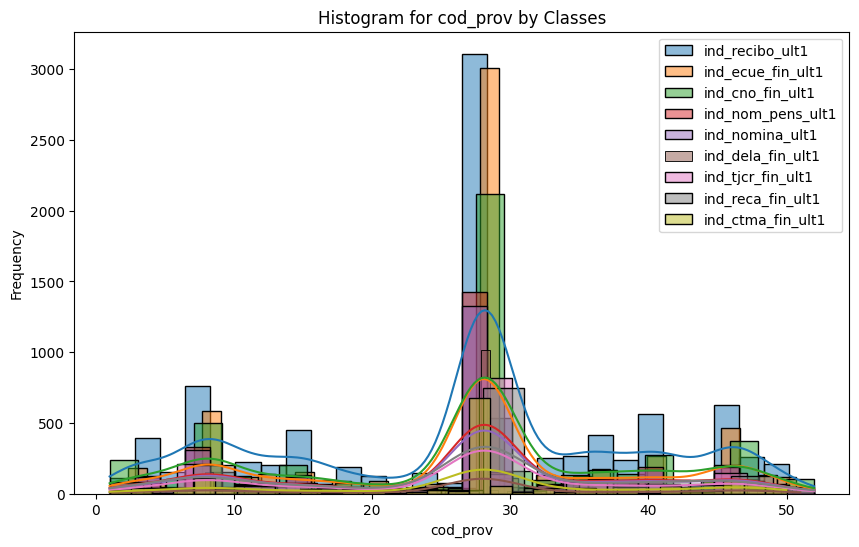

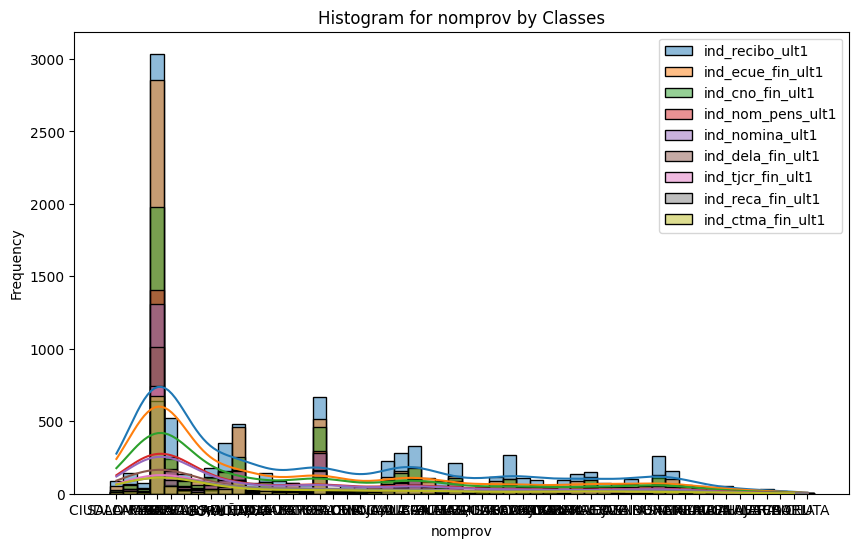

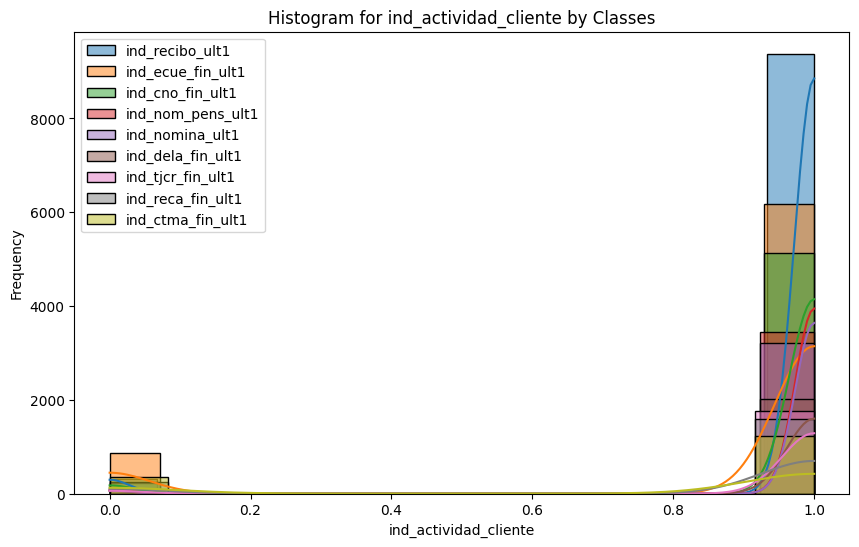

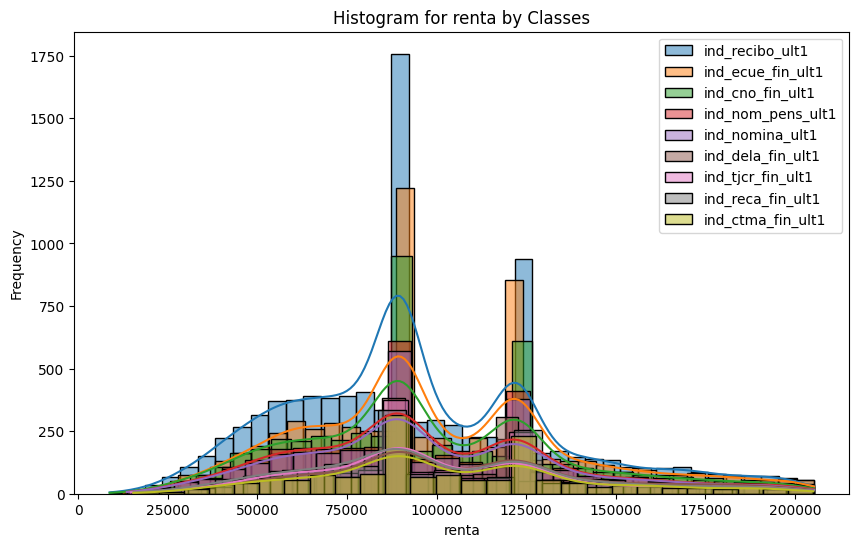

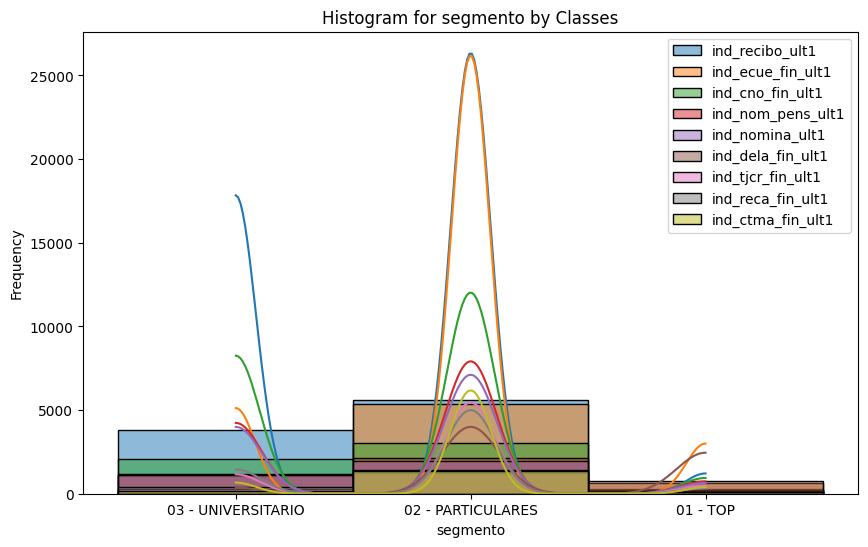

In [32]:
# Checking relationship between features and targets (NOT including 'ind_cco_fin_ult1')

for feature in new_features:
    plt.figure(figsize=(10, 6))
    
    # Plot histograms for each class
    for target_column in new_targets[1:]:
        sns.histplot(df[df[target_column] == 1][feature], kde=True, label=f'{target_column}')
    
    plt.title(f'Histogram for {feature} by Classes')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

Observations:

+ More females bought products
+ Early 30's bought the most products
+ Those who've been with bank for 36-38 months bought most products
+ Those in province codes 27-31 bought the most products
+ Those $80-$90k and $110-$126K rent bought the most products

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

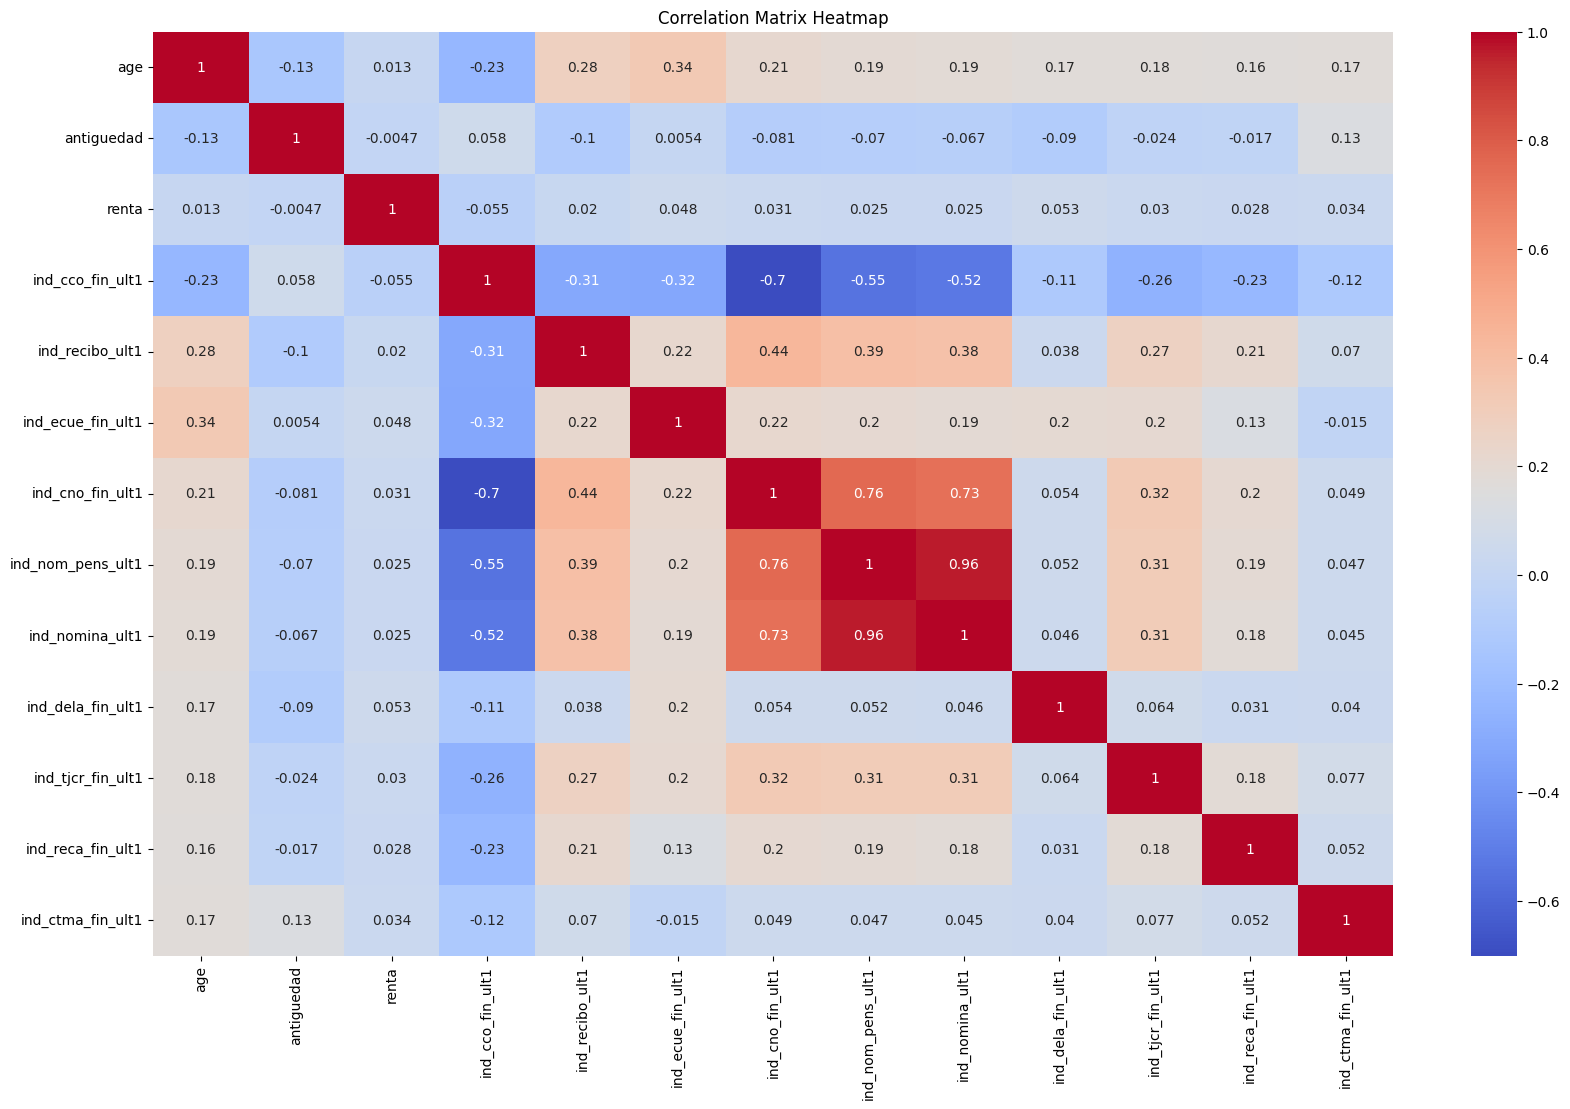

In [33]:
# CORRELATION BETWEEN NUMERICAL AND TARGET VALUES

selected_columns = ['age', 'antiguedad', 'renta'] + new_targets

subset_df = df[selected_columns]

correlation_matrix = subset_df.corr()

plt.figure(figsize=(20,12))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')

Observations:

+ Age had the most noticeable relationship with the target variables

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

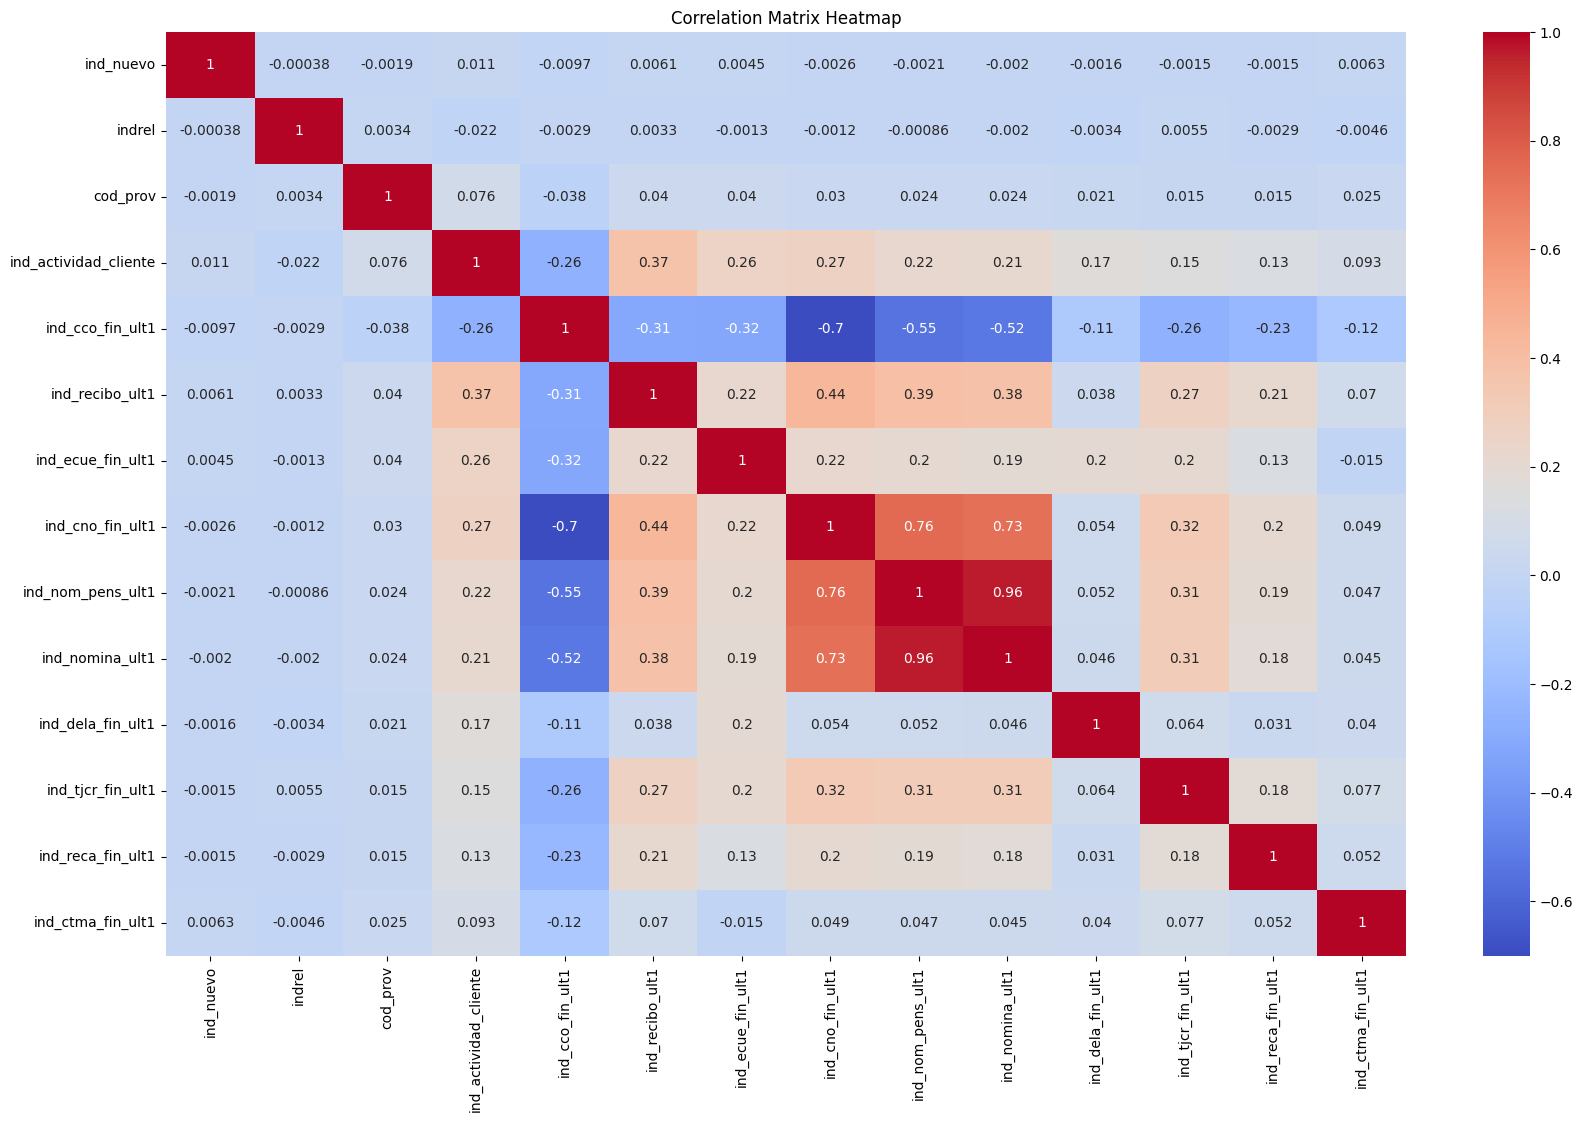

In [34]:
# CORRELATION BETWEEN ENCODED CLASSES AND TARGET VALUES

n_class = ['ind_nuevo', 'indrel', 'cod_prov', 'ind_actividad_cliente']

selected_columns = n_class + new_targets

subset_df = df[selected_columns]

correlation_matrix = subset_df.corr()

plt.figure(figsize=(20,12))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')

Observations:

+ ind_actividad_cliente had the most noticeable relationship with the target variables

In [35]:
new_targets

['ind_cco_fin_ult1',
 'ind_recibo_ult1',
 'ind_ecue_fin_ult1',
 'ind_cno_fin_ult1',
 'ind_nom_pens_ult1',
 'ind_nomina_ult1',
 'ind_dela_fin_ult1',
 'ind_tjcr_fin_ult1',
 'ind_reca_fin_ult1',
 'ind_ctma_fin_ult1']

# Machine Learning

## Problem Formulation

**Objective**:

The objects is to predict which products the customers of Santander bank are likely to buy, based on their demographic and historical banking data. This is a multi-class classification problem, where each customer can purchase multiple products.

**Data**:

Features:

+ *'sexo_encoded'*: Gender of the customer (categorical: 0 for male, 1 for female)
+ *'age'*: Age of the customer (numerical)
+ *'antiguedad'*: Seniority or tenure of the customer in months (numerical)
+ *'tiprel_1mes'*: Customer relation type at the beginning of the month (categorical: 0 for active, 1 for inactive')
+ *'cod_prov'*: Province code of the customer's residence (categorical)
+ *'ind_actividad_cliente'*: Indicator if the customer is active or not (binary: 0 for inactive, 1 for active)
+ *'renta'*: Gross income of the household where the customer resides (numerical)

Target Variables (Products):

+ *'ind_cco_fin_ult1'*: Current accounts
+ *'ind_recibo_ult1'*: Direct debits
+ *'ind_ecue_fin_ult1'*: e-account
+ *'ind_cno_fin_ult1'*: Payroll account
+ *'ind_nom_pens_ult1'*: Pensions
+ *'ind_nomina_ult1'*: Payroll
+ *'ind_dela_fin_ult1'*: Taxes
+ *'ind_tjcr_fin_ult1'*: Credit cards
+ *'ind_reca_fin_ult1'*: Taxes
+ *'ind_ctma_fin_ult1'*: Long-term deposits

**Performance Metric**:

I'll be using evaluation metrics suitable for multi-label classification tasks, such as:

+ Hamming loss
+ Jaccard similarity score
+ Precision, recall, and F1-score for each product
+ Micro/macro averaged metrics

**Model Selection**:

I've decided to try two different models for this task.

*K-Nearest Neighbors (KNN) Model*:

+ I chose this because of its ease of interpretation and robustness to outliers. KNN works by classifying instances based on the majority class among their k nearest neighbors.

*Random Forest Model*:

+ I chose this for its ability to handle outliers and complex relationships in the data. Random Forest builds multiple decision trees and combines their predictions through voting to make the final prediction

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

## KNN

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sexo_encoded'] = label_encoder.fit_transform(df['sexo'])

In [39]:
label_encoder = LabelEncoder()
df['tiprel_1mes_encoded'] = label_encoder.fit_transform(df['tiprel_1mes'])

In [41]:
features = ['sexo_encoded', 'age', 'antiguedad', 'tiprel_1mes_encoded', 'cod_prov',
            'ind_actividad_cliente', 'renta']

In [43]:
X = df[features]
y = df[new_targets]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=470)

In [44]:
# Preprocessing for numerical variables

numerical_features = ['age', 'antiguedad', 'renta']

numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                        ('scaler', StandardScaler())])

In [45]:
# Preprocessing for categorical variables

categorical_features = ['sexo_encoded', 'tiprel_1mes_encoded', 'cod_prov', 'ind_actividad_cliente']

categorical_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy='most_frequent')),
                                            ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [46]:
# Combining Preprocessing

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features),
                                               ('cat', categorical_transformer, categorical_features)])

In [47]:
knn_pipeline=Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', KNeighborsClassifier(n_neighbors=4))])

In [48]:
# Train
knn_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'antiguedad',
                                                   'renta']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sexo_encoded',
                                                   'tiprel_1mes_encoded',
                                                   'cod_prov',
                                                   'ind_actividad_cliente'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=4))])

In [49]:
# Test

y_pred_knn = knn_pipeline.predict(X_test)

In [50]:
# Accuracy 
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.7577076532462822

In [52]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("\nClassification Report For KNN:")
print(classification_report(y_test, y_pred_knn))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_knn))


Classification Report For KNN:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     17367
           1       0.37      0.12      0.18      1944
           2       0.46      0.15      0.22      1426
           3       0.20      0.03      0.05      1100
           4       0.19      0.01      0.03       711
           5       0.18      0.01      0.03       669
           6       0.35      0.04      0.07       447
           7       0.12      0.00      0.01       391
           8       0.14      0.00      0.01       360
           9       0.21      0.06      0.09       288

   micro avg       0.88      0.68      0.77     24703
   macro avg       0.31      0.14      0.16     24703
weighted avg       0.74      0.68      0.69     24703
 samples avg       0.84      0.81      0.81     24703


Accuracy Score: 0.7577076532462822


/home/sarahesayas/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sarahesayas/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

X = df[features]
Y = df[new_targets]

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)

In [54]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [55]:
# Initialize
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [56]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
y_pred = rf_classifier.predict(X_test)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7688481268459506


In [60]:
from sklearn.metrics import hamming_loss, jaccard_score, precision_score, recall_score, f1_score


# Compute evaluation metrics
hamming = hamming_loss(y_test, y_pred)
jaccard = jaccard_score(y_test, y_pred, average='samples')
precision = precision_score(y_test, y_pred, average='samples')
recall = recall_score(y_test, y_pred, average='samples')
f1 = f1_score(y_test, y_pred, average='samples')

print("Hamming Loss:", hamming)
print("Jaccard Similarity Score:", jaccard)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Hamming Loss: 0.05405461422871651
Jaccard Similarity Score: 0.8225817276493478
Precision: 0.8698946281450557
Recall: 0.843348779482776
F1 Score: 0.8448592325166241


/home/sarahesayas/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sarahesayas/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sarahesayas/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sarahesayas/.local/lib/python3.10/site-packages/sklearn/m

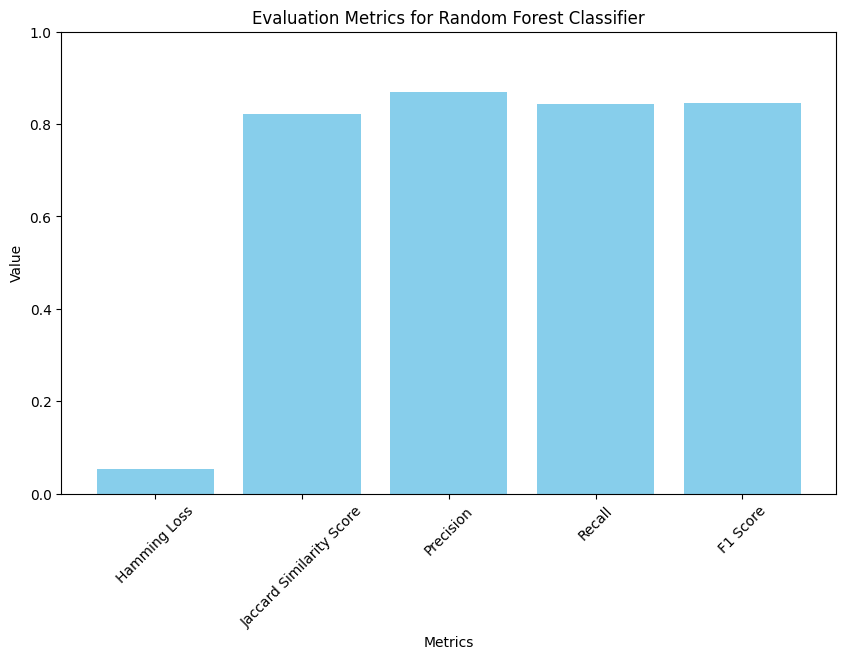

In [61]:
# Assuming you have computed the evaluation metrics: hamming, jaccard, precision, recall, and f1
evaluation_metrics = ['Hamming Loss', 'Jaccard Similarity Score', 'Precision', 'Recall', 'F1 Score']
metrics_values = [hamming, jaccard, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(evaluation_metrics, metrics_values, color='skyblue')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.ylim(0.0, 1.0)  # Adjust the y-axis limit if needed
plt.xticks(rotation=45)
plt.show()